Para instalar as bibliotecas:
* https://pypi.org/project/roboticstoolbox-python/
* https://pypi.org/project/spatialmath-python/

In [3]:
import numpy as np
import roboticstoolbox as rtb
from roboticstoolbox import *
from spatialmath import *
from math import pi
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import cm
import random
#%matplotlib notebook

Cria um robo, com um nome, e com uma determinada configuração.

* PrismaticDH = junta prismatica
* RevoluteDH = junta de rotação

Os parâmetros são sempre da seguinte forma:
* Para junta de rotação, temos 3 parametros de construção: a (r na imagem), d e alpha. Além disso, temos o parâmetro de movimentação, que é o theta. Em alguns casos, o theta pode ter um "offset". Na figura abaixo, se ao inves de theta_1*, tivessemos theta_1*+pi (na coluna theta da junta 1), então o offset da primeira junta seria pi. 
* Para junta primástica, temos 3 parâmetros de construção: a, alpha e theta. O parâmetro de movimentação é o d, que também pode ter um offset.

Para facilitar, como a e alpha são sempre parametros de construção, eu deixei eles como "a_list" e "alpha_list". O terceiro parâmetro de construção (que varia entre theta e d, para junta prismática e de rotação, respectivamente), eu deixei como "const_list". Isso vai facilitar a nossa vida, pq vamos poder usar os mesmos argumentos para construir os robos, independente de ter rotação ou prismática.

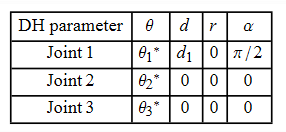


In [4]:
#definindo uma formula geral para um robo RRR (3 juntas)
def robo_RRR(my_name,const_list,a_list,alpha_list):
    robot = DHRobot(
      [
        RevoluteDH(d=const_list[0],a=a_list[0],alpha=alpha_list[0],offset=0),
        RevoluteDH(d=const_list[1],a=a_list[1],alpha=alpha_list[1],offset=0),
        RevoluteDH(d=const_list[2],a=a_list[2],alpha=alpha_list[2],offset=0),
       ], name=my_name)
    return robot

#fazendo o robo especifico acima (chamado de robo antropomorfico)
#d1 = 10, só como exemplo

def create_robo_ant(d1,name):
    const_list=[d1,0,0]
    a_list=[0,0,0]
    alpha_list=[pi/2,0,0]
    return robo_RRR(name,const_list,a_list,alpha_list)    

meu_robo_ant = create_robo_ant(10,'meu_robo_ant')
#ao fazer o print, você consegue ver a tabela. Observe como tá igual à imagem acima.
print(meu_robo_ant)

DHRobot: meu_robo_ant, 3 joints (RRR), dynamics, standard DH parameters
┏━━━━┳━━━━┳━━━━┳━━━━━━━┓
┃θⱼ  ┃ dⱼ ┃ aⱼ ┃  ⍺ⱼ   ┃
┣━━━━╋━━━━╋━━━━╋━━━━━━━┫
┃ q1 ┃ 10 ┃  0 ┃ 90.0° ┃
┃ q2 ┃  0 ┃  0 ┃  0.0° ┃
┃ q3 ┃  0 ┃  0 ┃  0.0° ┃
┗━━━━┻━━━━┻━━━━┻━━━━━━━┛



Agora, vamos fazer o robô SCARA, cuja matriz está abaixo:
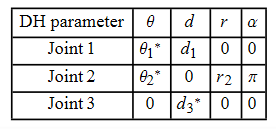

In [4]:
def robo_RRP(my_name,const_list,a_list,alpha_list):
    robot = DHRobot(
      [
        RevoluteDH(d=const_list[0],a=a_list[0],alpha=alpha_list[0],offset=0),
        RevoluteDH(d=const_list[1],a=a_list[1],alpha=alpha_list[1],offset=0),
        PrismaticDH(a=a_list[2],alpha=alpha_list[2],theta=const_list[2],offset=0),
       ], name=my_name)
    return robot

def create_robo_scara(d1,r2,d3,name):
    const_list=[d1,0,0]
    a_list=[0,r2,0]
    alpha_list=[0,pi,0]
    return robo_RRP(name,const_list,a_list,alpha_list)    
d1=10
r2=10
d3=10
meu_robo_scara = create_robo_scara(d1,r2,d3,'meu_robo_scara')
meu_robo_scara

DHRobot: meu_robo_scara, 3 joints (RRP), dynamics, standard DH parameters
┏━━━━━┳━━━━━┳━━━━┳━━━━━━━━┓
┃ θⱼ  ┃ dⱼ  ┃ aⱼ ┃   ⍺ⱼ   ┃
┣━━━━━╋━━━━━╋━━━━╋━━━━━━━━┫
┃ q1  ┃  10 ┃  0 ┃   0.0° ┃
┃ q2  ┃   0 ┃ 10 ┃ 180.0° ┃
┃0.0° ┃  q3 ┃  0 ┃   0.0° ┃
┗━━━━━┻━━━━━┻━━━━┻━━━━━━━━┛

Já deu pra entender a ideia geral...agora vou deixar aqui as outras combinações possíveis de 3 juntas

In [5]:
def robo_RPR(my_name,const_list,a_list,alpha_list):
    robot = DHRobot(
      [
        RevoluteDH(d=const_list[0],a=a_list[0],alpha=alpha_list[0],offset=0),
        PrismaticDH(a=a_list[1],alpha=alpha_list[1],theta=const_list[1],offset=0),
        RevoluteDH(d=const_list[2],a=a_list[2],alpha=alpha_list[2],offset=0),

       ], name=my_name)
    return robot

def robo_RPP(my_name,const_list,a_list,alpha_list):
    robot = DHRobot(
      [
        RevoluteDH(d=const_list[0],a=a_list[0],alpha=alpha_list[0],offset=0),
        PrismaticDH(a=a_list[1],alpha=alpha_list[1],theta=const_list[1],offset=0),
        PrismaticDH(a=a_list[2],alpha=alpha_list[2],theta=const_list[2],offset=0),
       ], name=my_name)
    return robot

def robo_PRR(my_name,const_list,a_list,alpha_list):
    robot = DHRobot(
      [
        PrismaticDH(a=a_list[0],alpha=alpha_list[0],theta=const_list[0],offset=0),
        RevoluteDH(d=const_list[1],a=a_list[1],alpha=alpha_list[1],offset=0),
        RevoluteDH(d=const_list[2],a=a_list[2],alpha=alpha_list[2],offset=0),
       ], name=my_name)
    return robot

def robo_PRP(my_name,const_list,a_list,alpha_list):
    robot = DHRobot(
      [
        PrismaticDH(a=a_list[0],alpha=alpha_list[0],theta=const_list[0],offset=0),
        RevoluteDH(d=const_list[1],a=a_list[1],alpha=alpha_list[1],offset=0),
        PrismaticDH(a=a_list[2],alpha=alpha_list[2],theta=const_list[2],offset=0),
       ], name=my_name)
    return robot

def robo_PPR(my_name,const_list,a_list,alpha_list):
    robot = DHRobot(
      [
        PrismaticDH(a=a_list[0],alpha=alpha_list[0],theta=const_list[0],offset=0),
        PrismaticDH(a=a_list[1],alpha=alpha_list[1],theta=const_list[1],offset=0),
        RevoluteDH(d=const_list[2],a=a_list[2],alpha=alpha_list[2],offset=0),
       ], name=my_name)
    return robot

def robo_PPP(my_name,const_list,a_list,alpha_list):
    robot = DHRobot(
      [
        PrismaticDH(a=a_list[0],alpha=alpha_list[0],theta=const_list[0],offset=0),
        PrismaticDH(a=a_list[1],alpha=alpha_list[1],theta=const_list[1],offset=0),
        PrismaticDH(a=a_list[2],alpha=alpha_list[2],theta=const_list[2],offset=0),
       ], name=my_name)
    return robot




In [6]:
#colocando todos os robos com a mesma configuração, só pra vc testar
#lembrar sempre que const_list significa coisas diferentes: pra junta prismática, é um angulo; pra de rotação, é um comprimento
#mas a ideia é que o próprio GA consiga ajustar isso
const_list=[15,15,15]
a_list=[15,15,15]
alpha_list=[pi/2,pi/2,pi/2]
all_robots_list={}
all_robots_list['RRR']=(robo_RRR('RRR',const_list,a_list,alpha_list))
all_robots_list['RRP']=(robo_RRP('RRP',const_list,a_list,alpha_list))
all_robots_list['RPR']=(robo_RPR('RPR',const_list,a_list,alpha_list))
all_robots_list['RPP']=(robo_RPP('RPP',const_list,a_list,alpha_list))
all_robots_list['PRR']=(robo_PRR('PRR',const_list,a_list,alpha_list))
all_robots_list['PRP']=(robo_PRP('PRP',const_list,a_list,alpha_list))
all_robots_list['PPR']=(robo_PPR('PPR',const_list,a_list,alpha_list))
all_robots_list['PPP']=(robo_PPP('PPP',const_list,a_list,alpha_list))

In [7]:
'''
pra achar a matriz 4x4 (que nós vamos usar para todos os calculos), basta fazer assim:
primeiro, você determina a posição inicial das juntas. Nesse caso, todas são juntas de rotação, então o valor que
você colocar aqui é um ângulo. 
q1 -> todas as juntas na posição inicial
q2 -> todas as juntas com angulo de 90 graus

O nome da matriz 4x4 é "matriz de transformação", e é representado na literatura pela letra H. Por isso deixei assim.


'''
q1=[0,0,0] 
q2=[pi/2,pi/2,pi/2]
print("matriz q1")

H_q1=meu_robo_ant.fkine(q1)
print(H_q1)
print("matriz q2")
H_q2=meu_robo_ant.fkine(q2)
print(H_q2)


#Para achar a posição do efetuador em relação à origem, basta pegar os 3 primeiros elementos da ultima coluna
#Não precisa saber mt da teoria, mas basicamente isso significa que, para os dois casos (q1 e q2), o efetuador está na posição
#(x,y,z)=(0,0,10), em relação à origem (a origem é definida como a base do robo)
#(estão em azul claro no print)
origem_junta_q1=H_q1.A[0:3,3]
origem_junta_q2=H_q1.A[0:3,3]
print("origem_junta_q1")
print(origem_junta_q1)
print("origem_junta_q2")
print(origem_junta_q2)

matriz q1
   1         0         0         0         
   0         0        -1         0         
   0         1         0         10        
   0         0         0         1         

matriz q2
   0         0         1         0         
  -1         0         0         0         
   0        -1         0         10        
   0         0         0         1         

origem_junta_q1
[ 0.  0. 10.]
origem_junta_q2
[ 0.  0. 10.]


In [8]:
#exemplo: robo RRR
meu_robo=all_robots_list['RRR']
q1=[0,0,0]
q2=[pi,pi,pi]
meu_robo.fkine(q1) #o robo está na posição (45,-15,0) em 3D

   1         0         0         45        
   0         0         1        -15        
   0        -1         0         0         
   0         0         0         1         


In [9]:
meu_robo.fkine(q2) #o robo está na posição (-15,15,30 em 3D)

  -1         0         0        -15        
   0         0         1         15        
   0         1         0         30        
   0         0         0         1         


Pra plotar o robo em 3d, é só usar .plot.

A gente só tem que ver certinho como faz "frame a frame", caso a gente queira mostrar a trajetória em algum momento (pra ficar bonito na hora de apresentar o vídeo e tal)

In [12]:
#posição inicial
meu_robo.plot(q1)

PyPlot3D backend, t = 0.05, scene:
  RRR

In [13]:
#posição final
meu_robo.plot(q2)

PyPlot3D backend, t = 0.05, scene:
  RRR

Mas eu achei essa ferramenta na biblioteca, que faz um gif com a trajetória entre duas configurações de juntas diferentes. A gente pode usar isso pra simular a nossa "trajetória.

Exemplo: q1 seria o que o AG acharia como o ponto mais próximo do ponto 1; e q2 seria a mesma coisa pro ponto 2
Ai a gente usa esse algoritmo para calcular a trajetória ideal entre esses dois pontos

<IPython.core.display.Javascript object>


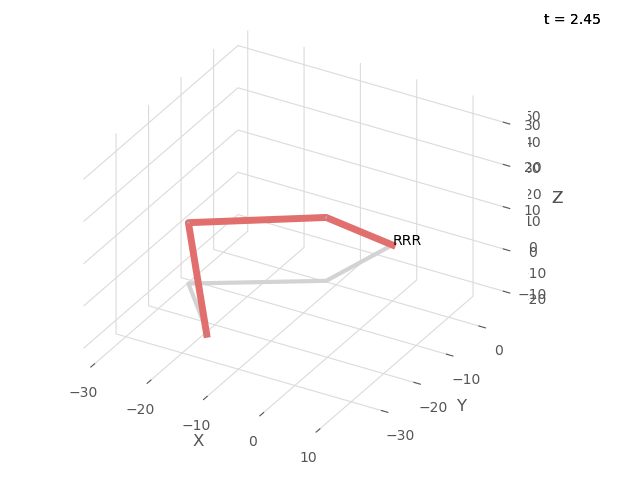

PyPlot3D backend, t = 2.499999999999999, scene:
  RRR

In [14]:
qt = rtb.jtraj(q1, q2, 50) #50 posições
meu_robo.plot(qt.q, movie='panda1.gif') #roda dnv, pra vc ver o gif

In [18]:
#esse qt.q, que é plotado no gif, é um vetor que começa em q1, termina em q2, e tem um comprimento de 50...pra cada posição,
#ele mostra o vetor das juntas
qt.q

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.58923282e-04, 2.58923282e-04, 2.58923282e-04],
       [2.00759244e-03, 2.00759244e-03, 2.00759244e-03],
       [6.56392374e-03, 6.56392374e-03, 6.56392374e-03],
       [1.50656626e-02, 1.50656626e-02, 1.50656626e-02],
       [2.84783914e-02, 2.84783914e-02, 2.84783914e-02],
       [4.76035364e-02, 4.76035364e-02, 4.76035364e-02],
       [7.30863764e-02, 7.30863764e-02, 7.30863764e-02],
       [1.05424049e-01, 1.05424049e-01, 1.05424049e-01],
       [1.44973560e-01, 1.44973560e-01, 1.44973560e-01],
       [1.91959789e-01, 1.91959789e-01, 1.91959789e-01],
       [2.46483498e-01, 2.46483498e-01, 2.46483498e-01],
       [3.08529339e-01, 3.08529339e-01, 3.08529339e-01],
       [3.77973863e-01, 3.77973863e-01, 3.77973863e-01],
       [4.54593523e-01, 4.54593523e-01, 4.54593523e-01],
       [5.38072686e-01, 5.38072686e-01, 5.38072686e-01],
       [6.28011642e-01, 6.28011642e-01, 6.28011642e-01],
       [7.23934605e-01, 7.23934

In [19]:
def dist(P1,P2): 
    return np.abs(np.sqrt(P1[0]**2+P1[1]**2+P1[2]**2)-np.sqrt(P2[0]**2+P2[1]**2+P2[2]**2))

Tentando minimizar a distância do robo ao ponto P1. EU peguei um ponto P1 a partir de uma configuração aleatória das juntas, pra garantir que o ponto realmente pode ser alcançado pelo robo (é isso que o AG3 vai fazer)

Gero uma matriz q de 0 a 2 pi aleatoriamente (pq é tudo angulo)

Verifico a distância entre o efetuador e o ponto P1, para aquela configuração

Da pra ver que chega em uma distância aceitável em poucas iterações

Tem potencial!

In [21]:
#Primeiro pra um robo só

meu_robo=all_robots_list['RRR']
min_dist=1e9
q_inicial=[random.random()*2*pi for i in range(3)]
P1=meu_robo.fkine(q_inicial).A[0:3,3]
q_inicial=[random.random()*2*pi for i in range(3)]
P2=meu_robo.fkine(q_inicial).A[0:3,3]
for idx in range(10000):
    q=[random.random()*2*pi for i in range(3)]
    P2=meu_robo.fkine(q).A[0:3,3]
    dist_efetuador=dist(P1,P2)
    if(dist_efetuador < min_dist):
        min_dist=dist_efetuador
        q_final=q
        print(dist_efetuador, idx)

7.554142574866837 0
4.595762276315369 6
2.6602857706119423 7
2.4997530914425425 24
0.06655833900617125 27
0.05996500322870446 992
0.05793737414659006 1715
0.02157477074081271 1818
0.004374942048670505 2034
0.0025772999177320344 3369


In [22]:
#verificando a trajetória entre os pontos gerados
qt = rtb.jtraj(q_inicial, q_final, 50) #50 posições
meu_robo.plot(qt.q, movie='gif_robo.gif') #roda dnv, pra vc ver o gif (fica salvo na variavel gif_robo.gif)

PyPlot3D backend, t = 2.499999999999999, scene:
  RRR

In [23]:
#agora com varios robos
#eu rodo 100 vezes
#pra todos os robos
#pego a media do numero de iterações e da distancia final
#da pra verificar como o tipo de robo influencia no numero de iteracoes
#observe que o q_inicial é sempre o mesmo 

limiar=0.05
iter_num=100
q_inicial=[random.random()*2*pi for i in range(3)]

idx_limiar={}
min_dist_dict={}
for key_robo in all_robots_list.keys():
    idx_limiar[key_robo]=0
    min_dist_dict[key_robo]=0
    
for iter in range(iter_num):
    #print(iter)
    for key_robo,meu_robo in all_robots_list.items():
        min_dist=1e9
        P1=meu_robo.fkine(q_inicial).A[0:3,3]
        for idx in range(1000):
            q=[random.random()*2*pi for i in range(3)]
            P2=meu_robo.fkine(q).A[0:3,3]
            dist_efetuador=dist(P1,P2)
            if(dist_efetuador < min_dist):
                min_dist=dist_efetuador
                q_final=q
                #print(dist_efetuador, idx)
                if(min_dist<limiar):
                    idx_limiar[key_robo]+=idx
                    min_dist_dict[key_robo]+=min_dist
                    break
for key_robo in all_robots_list.keys():
    idx_limiar[key_robo]/=iter_num
    min_dist_dict[key_robo]/=iter_num
    
for key_robo in all_robots_list.keys():
    print("Robo {}: {}, idx={}".format(key_robo,min_dist_dict[key_robo],idx_limiar[key_robo]))

Robo RRR: 0.021967295768532152, idx=270.84
Robo RRP: 0.02499099672767464, idx=229.01
Robo RPR: 0.024552400225438264, idx=121.79
Robo RPP: 0.023290081402921388, idx=51.89
Robo PRR: 0.02664958206699943, idx=241.98
Robo PRP: 0.025637199684637794, idx=87.51
Robo PPR: 0.026893782564291726, idx=67.07
Robo PPP: 0.02561141774205481, idx=45.39
